In [1]:
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import cartopy
import cartopy.util
import cartopy.crs as ccrs
import glob
import sys, os
import pickle, gzip
import datetime

In [2]:
run ../util/setupConsole_su

In [3]:
dirCmip6 = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/CMIP6'
dirERA5 = '/home/edcoffel/drive/MAX-Filer/Research/Climate-02/Data-02-edcoffel-F20/ERA5'
dirDeepak = '/home/edcoffel/drive/MAX-Filer/Research/Climate-01/Personal-F20/edcoffel-F20/data/projects/ag-land-climate/deepak'
dirAgData = '/home/edcoffel/drive/MAX-Filer/Research/Climate-01/Personal-F20/edcoffel-F20/data/projects/ag-land-climate'
dirProj = '/home/edcoffel/drive/MAX-Filer/Research/Climate-01/Personal-F20/edcoffel-F20/research/2020-ag-cmip6'
dirSacks = '/home/edcoffel/drive/MAX-Filer/Research/Climate-01/Personal-F20/edcoffel-F20/data/projects/ag-land-climate'


In [78]:
yearRange = [2000, 2000]

lat = 41
lon = 269

In [79]:
def in_time_range(y, y1, y2):
    return (y >= y1) & (y <= y2)

In [80]:
model = 'access-esm1-5'
cmip6_temp_hist = xr.open_mfdataset('%s/%s/r1i1p1f1/historical/tasmax/*.nc'%(dirCmip6, model), concat_dim='time')

print('selecting data for %s...'%model)

cmip6_temp_hist = cmip6_temp_hist.sel(lat=lat, lon=lon, method='nearest')
cmip6_temp_hist = cmip6_temp_hist.sel(time=in_time_range(cmip6_temp_hist['time.year'], yearRange[0], yearRange[1]))
cmip6_temp_hist.load()
cmip6_temp_hist['tasmax'] -= 273.15

selecting data for access-esm1-5...


In [81]:
data_cmip6 = cmip6_temp_hist.tasmax.values

In [88]:
temp_era5

<xarray.Dataset>
Dimensions:                        (time: 366)
Coordinates:
  * time                           (time) datetime64[ns] 2000-01-01 ... 2000-...
    longitude                      float32 269.0
    latitude                       float32 41.0
Data variables:
    __xarray_dataarray_variable__  (time) float64 3.257 8.949 ... -9.044 -11.96

In [89]:
temp_era5 = xr.open_dataset('%s/daily/tasmean_%d.nc'%(dirERA5, yearRange[0]))
temp_era5 = temp_era5.sel(latitude=lat, longitude=lon, method='nearest')
# temp_era5 = temp_era5.sel(time=in_time_range(cmip6_temp_hist['time.year'], yearRange[0], yearRange[1]))

temp_era5.load()
# temp_era5['mx2t'] -= 273.15

<xarray.Dataset>
Dimensions:                        (time: 366)
Coordinates:
  * time                           (time) datetime64[ns] 2000-01-01 ... 2000-...
    longitude                      float32 269.0
    latitude                       float32 41.0
Data variables:
    __xarray_dataarray_variable__  (time) float64 3.257 8.949 ... -9.044 -11.96

In [92]:
temp_era5.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                        (time: 366)
Coordinates:
  * time                           (time) datetime64[ns] 2000-01-01 ... 2000-...
    longitude                      float32 269.0
    latitude                       float32 41.0
Data variables:
    __xarray_dataarray_variable__  (time) float64 3.257 8.949 ... -9.044 -11.96>

In [93]:
# data_era5 = temp_era5.mx2t.values
data_era5 = temp_era5.__xarray_dataarray_variable__.values

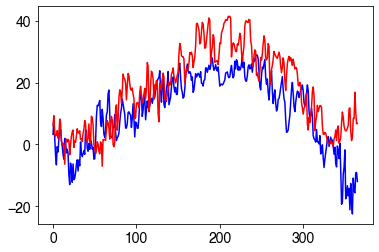

In [94]:
plt.plot(data_era5,color='b')
plt.plot(data_cmip6,color='r')

In [95]:
np.nanmean(data_era5), np.nanmean(data_cmip6)

(10.912030327888932, 17.58797)

In [96]:
np.nanmax(data_era5), np.nanmax(data_cmip6)

(28.925060528547874, 41.416534)